# Outliers

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as ss

## What is an outlier?

We have to be careful - extreme values are not necessarily due to error.

SS - Remember that the line stretching out in both directions on a normal distribution <i>approach</i> 0 on the y-axis, but they will never actually reach it, there is always a remote chance that an outlier may appear, if there are no other constraints on the data.

## The Normal Distribution - Scaling

LaTeX uses backslashes to begin functions, and the arguments for these are included instead curly brackets. The distinct font and centring comes from the double-dollar sign, if you used a single dollar-sign Python renders this as regular in-line text, such as $\frac{1}{2}$. LaTeX will display errors in red, as $\pa$ instead of $\pi$.

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} $$

In [2]:
# The number pi.
np.pi

3.141592653589793

In [3]:
# Square root of 2.
np.sqrt(2)

1.4142135623730951

In [4]:
# An approximation, but very close to 2.
1.4142135623730951**2

2.0000000000000004

In [5]:
# Called the scale in numpy.
sigma = 1.0
sigma

1.0

In [6]:
# This is just a number, close to 0.4.
1.0 / np.sqrt(2 * np.pi * sigma**2)

0.3989422804014327

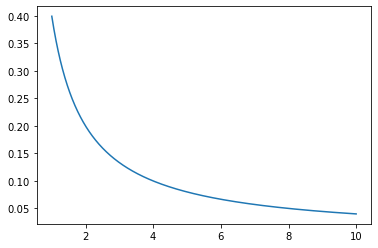

In [7]:
# Varying values of sigma for comparison.
sigma_vals = np.linspace(1.0, 10.0, 1000)

# Plot the formula.
plt.plot(sigma_vals, 1.0 / np.sqrt(2 * np.pi * sigma_vals**2));

## The Normal Distribution - the $e^x$ part

SS - All of the equation above is multiplied by the value below, which is $e$ to the power of negative (($x$ - $\mu$) squared) divided by ((2 times $\sigma$) squared). The <i>e</i> refers to [Euler's number](https://en.wikipedia.org/wiki/E_(mathematical_constant). The below section is Ian basically building the second part of the  equation step-by-step, until he gets to the full equatio of:

$$ e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

See: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [8]:
# Just a number, like pi.
np.e

2.718281828459045

SS - Go to [G4G](https://www.geeksforgeeks.org/numpy-linspace-python/) or [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for more information on `linspace`, which produces a sequence of evenly-spaced numbers.

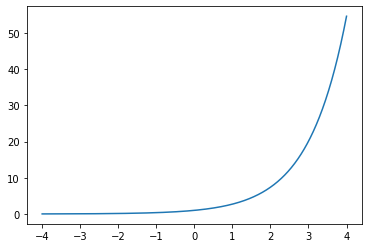

In [9]:
# Range of x values for plotting.
x = np.linspace(-4.0, 4.0, 1000)

# Plot of e^x - built into numpy as np.exp
plt.plot(x, np.exp(x));

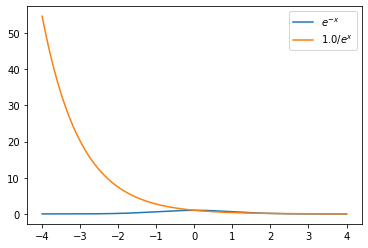

In [10]:
# Range of x values.
x = np.linspace(-4.0, 4.0, 1000)

# e to the minus x, Latex even works in pyplot
plt.plot(x, np.exp(-(x**2 / 2)), label=r'$e^{-x}$')

# Uncomment this to see it is equal to 1 / e^x.
plt.plot(x, 1.0 / np.exp(x), label=r'$1.0 / e^x$')

plt.legend();

SS - Once the value of each item is squared, this produces a bell curve. This is because of the minus that comes after the $e$ in $e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$. If the result of ${-\frac{(x - \mu)^2}{2 \sigma^2}}$ is a positive number, say 3, the the equation becomes $e^{--3^2}$. If the number produces -3, then the equation is $e^{-3^2}$ will be squared by a positive number (because it will be minus minus 2, for example), while if it is a positive, it will produce the negative (because there's only one minus symbol).

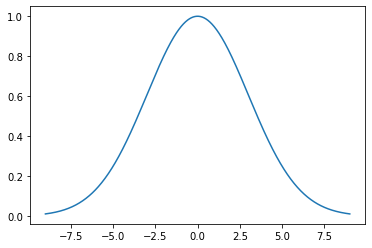

In [11]:
# These are involved in the exponent.
# Note we fix these values in subsequent plots.
mu, sigma = 0.0, 3.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Plot of full e part of normal probability distribution function
plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))));

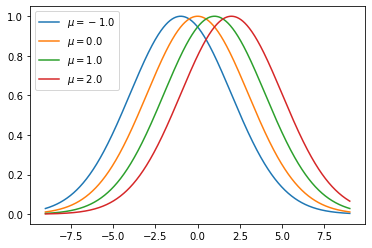

In [12]:
# Changing values of mu.
# The mu again represents the mean, this is why in numpy the particular parameter is called the loc, for location

# Set some initial values, we'll ignore this mu.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of mu.
for mu in [-1.0, 0.0, 1.0, 2.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\mu = {mu}$')

# Add a legend.
plt.legend();

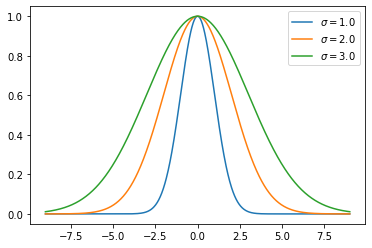

In [13]:
# Changing values of sigma.
# Note that sigma also occurs in the first part involving the square root.

# Set some initial values, we'll ignore this sigma.
mu, sigma = 0.0, 3.0

# x values for plot.
x = np.linspace(-9.0, 9.0, 1000)

# Plot the function for several different values of sigma.
for sigma in [1.0, 2.0, 3.0]:
    plt.plot(x, np.exp(-((x - mu)**2 / (2 * sigma**2))), label=rf'$\sigma = {sigma}$')

# Add a legend.
plt.legend();

## Normal Distribution - All Together

Below is the full normal distribution calculation written in LaTeX.

$$ \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

For the purpose of the next code cell, part 1 refers to $\frac{1}{\sqrt{2 \pi \sigma^2 }}$ and part 2 refers to $e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$.

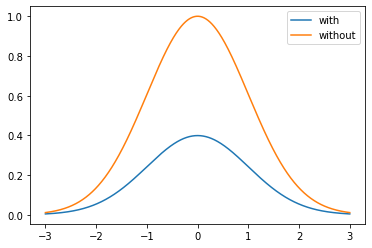

In [14]:
# Set mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-3.0, 3.0, 1000)

# First part, with the square root.
part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
# Second part, with the e.
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
# The output is the product.
y = part1 * part2

# Plot x and y (y being the part1 * part2 above)
plt.plot(x, y, label='with')
# Show without scaling by first part (which is represented by y). This is higher than 'with' 
plt.plot(x, part2, label='without')

plt.legend();

The first part always divides 1 by the square root of (2 x pi x sigma) squared. The effect of part 1 is that the integration (https://www.mathsisfun.com/calculus/integration-introduction.html) is always 1, the total value of the area between the x-axis and the blue line is 1.

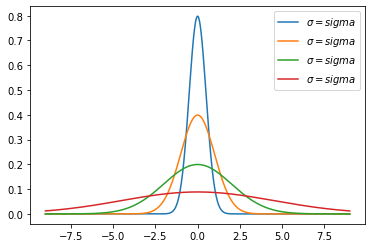

In [15]:
# Changing values of sigma.
# Note that sigma occurs in part 1 and part 2.
# So, the height of the curve is also affected.

# Set initial mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-9.0, 9.0, 1000)

# Different values of sigma.
for sigma in [0.5, 1.0, 2.0, 4.5]:
    # First part, with the square root. This is the same as what is shown in the sixth code cell in this workbook
    part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
    # Second part, with the e.
    part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
    # The output is the product.
    y = part1 * part2
    # Plot x and y.
    plt.plot(x, y, label='$\sigma = {sigma}$')

plt.legend();

## Percentiles

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html - this is the next step in using normal distribution after NumPy.

SS - Just as the line in the probability distribution function can get very close to zero but will never go to zero, the result of the whole function can never be zero, no matter what values are added to it. This difference between something being unlikely and something being impossible is where outliers comes in; it is possible to have extreme values appearing somewhere on this line, that stretches towards both $-\infty$ and $\infty$.

In [16]:
# Picking random values on the curve.
np.random.normal(0.0, 1.0)

-0.5586473666801022

In [17]:
# Picking random values on the curve - the max of 10000000.
# Would you describe it as an outlier?
np.random.normal(0.0, 1.0, 10000000).max()

5.469685483179098

In [18]:
# The x value at the 99th percentile.
# 99% of all randomly generated values will be below this.
ss.norm().ppf(0.99)

2.3263478740408408

SS - note that the above now uses the SciPy function.

![image](normal-pdf-cdf.png)

SS - The `ppf` function returns the given percentile of the range, so a figure of 0.8 returns the value at which 80% of the range is less than the returned value, while the `cdf` function does the opposite; you pass a value and it returns the percentile, or cumulative distribution, hence 'cdf'. You can see the effect of this in the chart above, from [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution), which shows the values on the right, the <i>cumulative distribution function</i> accumulating from 0 to 1, and the rate of this accumulation increasing at the same point at which the most values are clustered together in the chart on the left, in the <i>probability density function</i>.

In [19]:
# The 50th percentile - the mean in this case
ss.norm().ppf(0.50)

0.0

In [20]:
# The percentile of 0.0 on the x axis.
ss.norm().cdf(0.0)

0.5

SS - Below shows the probability of generating a value less than 3.0 and greater than -3.0. Three sigma is always over 99.7% of the range, and six is obviously even higher than that.

In [21]:
ss.norm().cdf(3.0) - ss.norm().cdf(-3.0)

0.9973002039367398

In [22]:
# Six sigma, where sigma is 1.0 and mu is 0.0.
ss.norm().cdf(6.0) - ss.norm().cdf(-6.0)

0.9999999980268246

## Quartiles

In [23]:
# 3rd quartile - the 75th percentile.
ss.norm().ppf(0.75)

0.6744897501960817

In [24]:
# 2nd quartile - the 50th percentile.
ss.norm().ppf(0.5)

0.0

In [25]:
# 1st quartile - the 25th percentile.
ss.norm().ppf(0.25)

-0.6744897501960817

Note the quartile is usually the range, not the point. 

SS - This is a recurrence of the [off-by-one problem](https://en.wikipedia.org/wiki/Off-by-one_error), whereby three values divide a range into four parts. This is best summed up in the link above by the phrase, "A straight fence with <i>n</i> sections has <i>n+1</i> posts." Often people will mistake the quartiles above given as the value rather than the range.

## Box Plots

Documentation here: [Matplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

SS - From [Wiki](https://en.wikipedia.org/wiki/Box_plot):

    "A boxplot is a standardised way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles."
    
Wiki goes on to explain that the first quartile is the median of the lower half of the dataset, and the third quartile is the median of the upper half. Also note that in the [five-number summary](https://en.wikipedia.org/wiki/Five-number_summary), one of the numbers is the sample median, not the sample mean; just like the mean, the median isn't necessarily contained somewhere within the dataset.

In [26]:
# Read in the Morley data.
data = np.genfromtxt('morley.csv', skip_header=1, delimiter=',', deletechars='"')

In [27]:
# Select the data for the first experiment, the first twenty values from the second column
exper_1 = data[:20, 2]

exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [28]:
# Select the data for the second experiment.
exper_2 = data[20:40, 2]

exper_2

array([960., 940., 960., 940., 880., 800., 850., 880., 900., 840., 830.,
       790., 810., 880., 880., 830., 800., 790., 760., 800.])

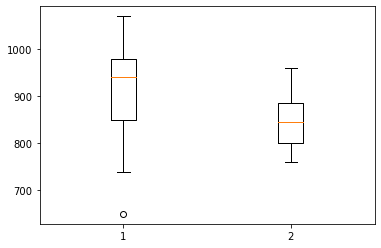

In [29]:
# Create a box plot.
plt.boxplot(np.array([exper_1, exper_2]).T);

In [30]:
# A quick way to get the five experiments in different columns, https://www.geeksforgeeks.org/numpy-reshape-python/
data[:,2].reshape(5, 20).T

array([[ 850.,  960.,  880.,  890.,  890.],
       [ 740.,  940.,  880.,  810.,  840.],
       [ 900.,  960.,  880.,  810.,  780.],
       [1070.,  940.,  860.,  820.,  810.],
       [ 930.,  880.,  720.,  800.,  760.],
       [ 850.,  800.,  720.,  770.,  810.],
       [ 950.,  850.,  620.,  760.,  790.],
       [ 980.,  880.,  860.,  740.,  810.],
       [ 980.,  900.,  970.,  750.,  820.],
       [ 880.,  840.,  950.,  760.,  850.],
       [1000.,  830.,  880.,  910.,  870.],
       [ 980.,  790.,  910.,  920.,  870.],
       [ 930.,  810.,  850.,  890.,  810.],
       [ 650.,  880.,  870.,  860.,  740.],
       [ 760.,  880.,  840.,  880.,  810.],
       [ 810.,  830.,  840.,  720.,  940.],
       [1000.,  800.,  850.,  840.,  950.],
       [1000.,  790.,  840.,  850.,  800.],
       [ 960.,  760.,  840.,  850.,  810.],
       [ 960.,  800.,  840.,  780.,  870.]])

## Inter-Quartile Range

SS - The box itself represents the inter-quartile range, which is "the distance between the upper and lower quartiles." The whiskers often represent the maximum and minimum values, but actually represent the highest and lower values that fall within a distance that is 1.5 times the size of the IQR. Any items outside of this range are instead shown as circles to distinguish them, and this is how an outlier is defined.

SS (this is just a comment on something Ian mentioned in passing, rather than any actual point he made) - If you were to use the mean instead of the median, then any outliers would have a larger effect on the mean than items closer to it. By using the median, surely the overall impact of any value is only ever the same as any other value, because the median counts the number of items in the range and divides by two, rather than summing their value and dividing by this same count?

In [31]:
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

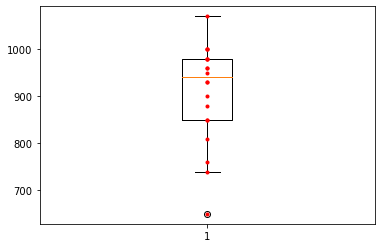

In [32]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.');

In [33]:
# The values.
exper_1

array([ 850.,  740.,  900., 1070.,  930.,  850.,  950.,  980.,  980.,
        880., 1000.,  980.,  930.,  650.,  760.,  810., 1000., 1000.,
        960.,  960.])

In [34]:
# The values, but sorted.
np.sort(exper_1)

array([ 650.,  740.,  760.,  810.,  850.,  850.,  880.,  900.,  930.,
        930.,  950.,  960.,  960.,  980.,  980.,  980., 1000., 1000.,
       1000., 1070.])

In [35]:
# Calculate the mean - three ways.
exper_1.mean(), np.mean(exper_1), sum(exper_1) / len(exper_1)

(909.0, 909.0, 909.0)

In [36]:
# Median of exper_1.
np.median(exper_1)

940.0

In [37]:
# The median is the 50th percentile.
np.percentile(exper_1, 50)

940.0

In [38]:
# Upper quartile value.
q3 = np.percentile(exper_1, 75)

q3

980.0

In [39]:
# Median of the top half of values.
np.median(np.sort(exper_1)[10:])

980.0

In [40]:
# Upper quartile value.
q1 = np.percentile(exper_1, 25)

q1

850.0

In [41]:
# Median of the bottom half of values.
np.median(np.sort(exper_1)[:10])

850.0

In [42]:
# Inter-quartile range.
iqr = np.percentile(exper_1, 75) - np.percentile(exper_1, 25)

iqr

130.0

In [43]:
# Max upper whisker.
q3 + iqr

1110.0

In [44]:
# Min lower whisker.
q1 - iqr

720.0

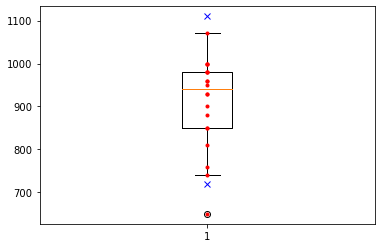

In [45]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.')

# Add the max whisker lengths.
ax.plot([1.0, 1.0], [q1 - iqr, q3 + iqr], 'bx');

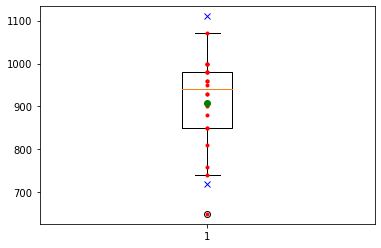

In [46]:
# Create a figure.
fig, ax = plt.subplots()

# Add the boxplot.
ax.boxplot(exper_1)

# Plots red dots at (1, value) for each value in exper_1.
ax.plot(np.ones(exper_1.shape), exper_1, 'r.')

# Add the max whisker lengths.
ax.plot([1.0, 1.0], [q1 - iqr, q3 + iqr], 'bx')

# Plot the mean.
ax.plot([1.0], [np.mean(exper_1)], 'go');

In [47]:
# Values above the mean.
exper_1[exper_1 > exper_1.mean()]

array([1070.,  930.,  950.,  980.,  980., 1000.,  980.,  930., 1000.,
       1000.,  960.,  960.])

In [48]:
# Values above the mean.
exper_1[exper_1 < exper_1.mean()]

array([850., 740., 900., 850., 880., 650., 760., 810.])

## A Data Set

In the next cell I am going to generate a set of numbers.

We will then plot and consider them.

In [49]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

In [50]:
# Create a corresponding series of y vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

In [51]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

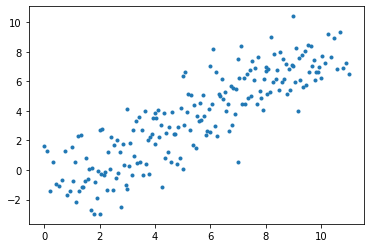

In [52]:
# Plot.
plt.plot(x, y, '.');

It looks like the points go from bottom left to top right.

Let's fit a best-fit straight line and see how it looks.

## Best-Fit Line

In the next cell I am going to generate a set of numbers.

We will then plot and consider them.

$ y = mx + c$

SS - here, the larger the number represented by $m$, the steeper the line, and $+ c$ represents the point where the line intercepts the y-axis.

In [53]:
# Best-fit line slope and y intercept.
m, c = np.polyfit(x, y, 1)

In [54]:
# Create a steadily increasing x range for plotting.
xbestfit = np.linspace(x.min(), x.max(), 1000)
# Create corresponding y values form best fit line.
ybestfit = m * xbestfit + c

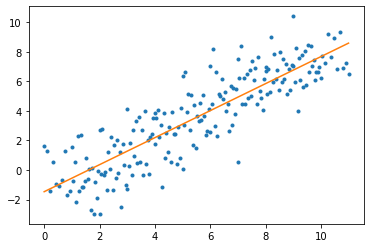

In [55]:
# Plot points.
plt.plot(x, y, '.')

# Plot line.
plt.plot(xbestfit, ybestfit);

## Colours

By showing a different facet of the data, some of the items that previously looked like outliers are not.

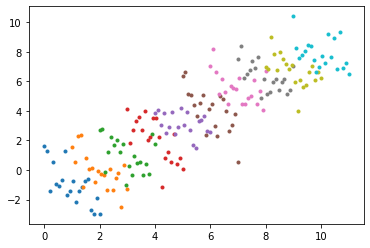

In [56]:
# Plot the same points, but now with a different colour for each range.
for i in range(len(xs)):
    plt.plot(xs[i], ys[i], '.')

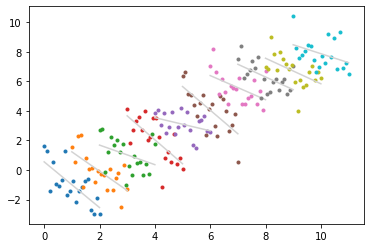

In [57]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

See [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox).